In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import sys
import os
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.multioutput import MultiOutputRegressor
from IPython.display import clear_output
import time
from tabulate import tabulate
from sklearn import preprocessing, linear_model
from sklearn.preprocessing import StandardScaler



In [ ]:
def update_x(x, sigma, r, b, dt):
  tmp1 = sigma*(-x[0] + x[1])
  tmp2 = (-x[0]*x[2]) + (r * x[0]) - x[1]
  tmp3 = (x[0]*x[1]) - (b*x[2]) 
  tmpS = np.array([tmp1,tmp2, tmp3])
  return np.add(x, dt*tmpS)

def data_generation (sigma, r, b, dt, T, numOfPath):
  tlist = np.linspace(0, T, int(T/dt+1))
  ind = list(range(len(tlist)))

  x1 = np.zeros([numOfPath, len(tlist)])
  x2 = np.zeros([numOfPath, len(tlist)])
  x3 = np.zeros([numOfPath, len(tlist)])
  
  for n in range (numOfPath):
    x = -1 + 2*np.random.rand(3)
    for i in range(len(tlist)):
      x1[n,i] = x[0]
      x2[n,i] = x[1]
      x3[n,i] = x[2]
      x = update_x(x, sigma, r, b , dt)
    clear_output(wait=True)
    print(f' {100*(n+1)/numOfPath}  "% done')  

  return tlist, x1, x2, x3

def plotter(x1, x2, x3, path):
  fig = plt.figure()
  ax = plt.axes(projection='3d')
  ax.plot(x1[path,:], x2[path,:], x3[path,:])

In [ ]:
sigma = 10
r = 28
b = 8/3
dt = .02
T = 53
n_paths = 500
t_list, x1, x2, x3 = data_generation(sigma, r, b, dt, T, n_paths)

 100.0  "% done


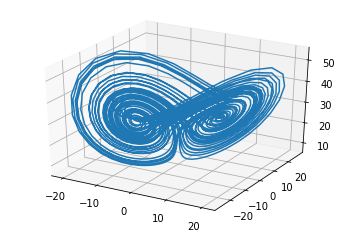

In [ ]:
transient = int(3 / dt)
x1 = x1[:,transient:]
x2 = x2[:,transient:]
x3 = x3[:,transient:]
plotter(x1,x2,x3,0)


In [ ]:
split = int(x1.shape[1]*0.7)


train = range(split)
test = range(split, int(x1.shape[1]))

print(f'test len = {str(len(test))}')
print(f'train len = {str(len(train))}')


test len = 751
train len = 1750


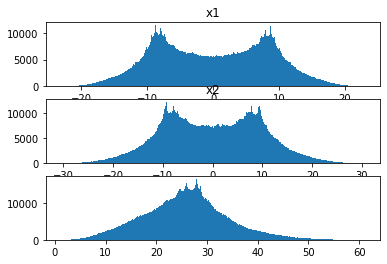

Axis      Minimum        Mean    Variance    Maximum
------  ---------  ----------  ----------  ---------
x1      -23.1437   -0.0452782     71.559     23.1267
x2      -30.4735   -0.0444208     93.1252    30.639
x3        1.15694  25.8318        68.7164    61.1802


In [ ]:
fig, axs = plt.subplots(3)
axs[0].hist(x1.flatten(),bins=300)
axs[0].set_title('x1')
axs[1].hist(x2.flatten(),bins=300)
axs[1].set_title('x2')
axs[2].hist(x3.flatten(),bins=300)
plt.show()

print(
    tabulate(
        [['x1', x1.min(), x1.mean(), x1.var(), x1.max()],
         ['x2', x2.min(), x2.mean(), x2.var(), x2.max()],
         ['x3', x3.min(), x3.mean(), x3.var(), x3.max()]],
        headers=['Axis', 'Minimum', 'Mean', 'Variance', 'Maximum']
    )
)

In [ ]:
import pkg_resources
import types
def get_imports():
    for name, val in globals().items():
        if isinstance(val, types.ModuleType):
            # Split ensures you get root package, 
            # not just imported function
            name = val.__name__.split(".")[0]

        elif isinstance(val, type):
            name = val.__module__.split(".")[0]

        # Some packages are weird and have different
        # imported names vs. system/pip names. Unfortunately,
        # there is no systematic way to get pip names from
        # a package's imported name. You'll have to add
        # exceptions to this list manually!
        poorly_named_packages = {
            "PIL": "Pillow",
            "sklearn": "scikit-learn"
        }
        if name in poorly_named_packages.keys():
            name = poorly_named_packages[name]

        yield name
imports = list(set(get_imports()))

# The only way I found to get the version of the root package
# from only the name of the package is to cross-check the names 
# of installed packages vs. imported packages
requirements = []
for m in pkg_resources.working_set:
    if m.project_name in imports and m.project_name!="pip":
        requirements.append((m.project_name, m.version))

for r in requirements:
    print("{}=={}".format(*r))

tabulate==0.8.9
scikit-learn==0.22.2.post1
numpy==1.19.5
matplotlib==3.2.2


[[-0.56667188 -0.61036172 -0.66315834 ...  1.20092492  1.31733313
   1.3705054 ]
 [-0.77022389 -0.7029838  -0.6461457  ...  0.69800768  0.67904294
   0.66934809]
 [-0.14491229 -0.17896383 -0.20939044 ...  0.48332953  0.50643164
   0.5382596 ]
 ...
 [-0.6833968  -0.66375179 -0.65347545 ... -0.3893577  -0.43228804
  -0.4759632 ]
 [ 1.01236936  1.03749102  1.06284029 ... -0.0085147  -0.23856887
  -0.41777945]
 [-0.63306109 -0.75622735 -0.90191364 ... -0.20743226 -0.23873875
  -0.27573727]]
[[-0.56667188 -0.61036172 -0.66315834 ...  1.20092492  1.31733313
   1.3705054 ]
 [-0.77022389 -0.7029838  -0.6461457  ...  0.69800768  0.67904294
   0.66934809]
 [-0.14491229 -0.17896383 -0.20939044 ...  0.48332953  0.50643164
   0.5382596 ]
 ...
 [-0.6833968  -0.66375179 -0.65347545 ... -0.3893577  -0.43228804
  -0.4759632 ]
 [ 1.01236936  1.03749102  1.06284029 ... -0.0085147  -0.23856887
  -0.41777945]
 [-0.63306109 -0.75622735 -0.90191364 ... -0.20743226 -0.23873875
  -0.27573727]]


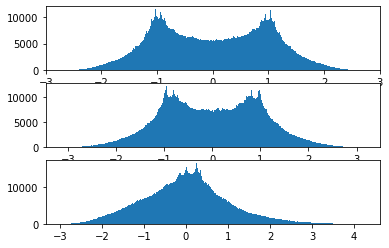

Axis      Minimum          Mean    Variance    Maximum
------  ---------  ------------  ----------  ---------
x1       -2.73055  -1.92736e-17           1    2.73925
x2       -3.15323  -8.75039e-18           1    3.17959
x3       -2.97663  -1.06255e-17           1    4.26422


In [ ]:
print(x1)

scaler_x1 = StandardScaler(with_mean=True, with_std=True).fit(x1.reshape(-1,1))
scaler_x2 = StandardScaler(with_mean=True, with_std=True).fit(x2.reshape(-1,1))
scaler_x3 = StandardScaler(with_mean=True, with_std=True).fit(x3.reshape(-1,1))
print(x1)
x1 = scaler_x1.transform(x1)
x2 = scaler_x2.transform(x2)
x3 = scaler_x3.transform(x3)

fig, axs = plt.subplots(3)
axs[0].hist(x1.flatten(),bins=300)
axs[1].hist(x2.flatten(),bins=300)
axs[2].hist(x3.flatten(),bins=300)
plt.show()

print(
    tabulate(
        [['x1', x1.min(), x1.mean(), x1.var(), x1.max()],
         ['x2', x2.min(), x2.mean(), x2.var(), x2.max()],
         ['x3', x3.min(), x3.mean(), x3.var(), x3.max()]],
        headers=['Axis', 'Minimum', 'Mean', 'Variance', 'Maximum']
    )
)



In [ ]:
n_reservoir = 400
n_in = 3
n_out = 3
n_layers = 2 
density = 0.08
in_density = 2
scheme = 'uniform'
leak = 0.05 
connectivity = 3 #this influences how close things cluster
M = 50

In [ ]:
def weight_matrix_generation(n_in, n_out, density, connectivity,scheme, M=0):
  n = n_in * n_out
  r = -(connectivity-1) + connectivity * np.random.rand(n_in, n_out)
  if scheme == 'uniform':
      W = np.random.rand(n_in, n_out) < density
  elif scheme == 'erdos':
    P = 0.4
    if M == 0:
       M = np.random.rand(1, n)
    W = np.zeros((n_in, n_out))
    for i in range(M):
     for j in range(M):
         if (i < j):

             # Take random number R.
             R = np.random.rand()

             # Check if R<P add the edge to the graph else ignore.
             if (R < P):
                 W[i,j] = 1

  else:
        sys.exit('Invalid scheme parameter')
  return np.multiply(W, r)


class layer:
  def __init__ (self, n_reservoir, n_in, n_out, density, in_density,
                connectivity, scheme, is_first_layer=False,leaky_rate=None, M=0):
    
    self.W_in = -.1 + .2*np.random.rand(n_in, n_reservoir)
    self.W = weight_matrix_generation(n_reservoir, n_reservoir, density, connectivity,scheme,M)
    scale = 1/self.W.max()
    self.W = self.W /scale
  
    self.x = np.expand_dims(np.zeros(n_reservoir), 1)
    self.a = leaky_rate


  def update(self, u):
    
    recursion = np.dot(self.W, self.x)
    if len(u.shape) == 1:
      inward = np.dot(self.W_in.T, np.expand_dims(u,1))
    else:
      inward = np.dot(self.W_in.T, u)  

    if not self.a is None:

      recursion = self.a * recursion
      inward = (1- self.a) * inward
     
    #print(len(recursion))
    #print(len(inward))
    self.x = np.tanh(recursion + inward)  

This uses tanh() activation.

In [ ]:




print(scheme)

savelayers = []

for i in range(n_layers):
  if i == 0:
    savelayers.append(layer(n_reservoir,n_in, n_reservoir,        density, in_density, connectivity, scheme,  True, leak, M))
  elif i == n_layers-1:
    savelayers.append(layer(n_reservoir,n_reservoir, n_out,       density, in_density, connectivity, scheme, False, leak, M))
  else: 
    savelayers.append(layer(n_reservoir,n_reservoir, n_reservoir, density, in_density, connectivity, scheme, False, leak, M))

X = np.zeros((n_paths, len(train), n_reservoir))

uniform


In [ ]:


print("ar")

for i in range(n_paths):
  layers = savelayers
  for t in train:
    v = np.array([x1[i,t], x2[i,t], x3[i,t]])

    layers[0].update(v)

    for j in  range (1, n_layers):
      layers[j].update(layers[j-1].x)
      X[i,t] = np.squeeze(layers[n_layers-1].x)

  print(f'{str(i+1)} of {str(n_paths)} complete')

ar
1 of 500 complete
2 of 500 complete
3 of 500 complete
4 of 500 complete
5 of 500 complete
6 of 500 complete
7 of 500 complete
8 of 500 complete
9 of 500 complete
10 of 500 complete
11 of 500 complete
12 of 500 complete
13 of 500 complete
14 of 500 complete
15 of 500 complete
16 of 500 complete
17 of 500 complete
18 of 500 complete
19 of 500 complete
20 of 500 complete
21 of 500 complete
22 of 500 complete
23 of 500 complete
24 of 500 complete
25 of 500 complete
26 of 500 complete
27 of 500 complete
28 of 500 complete
29 of 500 complete
30 of 500 complete
31 of 500 complete
32 of 500 complete
33 of 500 complete
34 of 500 complete
35 of 500 complete
36 of 500 complete
37 of 500 complete
38 of 500 complete
39 of 500 complete
40 of 500 complete
41 of 500 complete
42 of 500 complete
43 of 500 complete
44 of 500 complete
45 of 500 complete
46 of 500 complete
47 of 500 complete
48 of 500 complete
49 of 500 complete
50 of 500 complete
51 of 500 complete
52 of 500 complete
53 of 500 complete

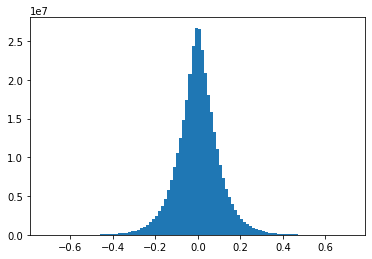

In [ ]:
plt.hist(X.flatten(),bins=100)
plt.show()

In [ ]:

tmp_X = X[:,transient:].reshape((-1, n_reservoir))
t_list = np.arange(transient+1, len(train)+1)

y1t = np.array(x1[:, t_list]).reshape(-1, 1)
y2t = np.array(x2[:, t_list]).reshape(-1, 1)
y3t = np.array(x3[:, t_list]).reshape(-1, 1)

model = []
model1 = LinearRegression().fit(tmp_X, y1t)
print("done 1/3")
model2 = LinearRegression().fit(tmp_X, y2t)
print("done 2/3")
model3 = LinearRegression().fit(tmp_X, y3t)
print("done 3/3")




done 1/3
done 2/3
done 3/3


In [ ]:
mse1 = np.mean((model1.predict(tmp_X)- y1t)**2)
mse2 = np.mean((model2.predict(tmp_X)- y2t)**2)
mse3 = np.mean((model3.predict(tmp_X)- y3t)**2)


print(f'x1  mse =   {mse1}')
print(f'x2  mse =   {mse2}')
print(f'x3  mse =   {mse3}')   

x1  mse =   1.3523783137207545e-21
x2  mse =   1.3983889604876787e-19
x3  mse =   4.903538746199783e-19


Time to do predictions 

In [ ]:
last = np.zeros((n_paths, len(train), n_reservoir))

last2 = np.zeros((n_paths, len(train)-1, n_out))

target = np.zeros((n_paths, len(train)-1, n_out))

start =train[0]

for i in range(n_paths):
  v = np.array([x1[i,start], x2[i,start], x3[i,start]])
  layers = savelayers
  for j in range(len(train)-1):
    layers[0].update(v)
    for k in range(1, n_layers):
      layers[k].update(layers[k-1].x)

    last[i,j] = np.squeeze(layers[n_layers-1].x)
    target[i,j] = np.squeeze(np.array([x1[i, j+start+1], x2[i, j+start+1], x3[i, j+start+1]]))
    if j > transient:
      pred1 = model1.predict(np.expand_dims(last[i, j], 1).T)
      pred2 = model2.predict(np.expand_dims(last[i, j], 1).T)
      pred3 = model3.predict(np.expand_dims(last[i, j], 1).T)
      last2[i,j] = np.squeeze(np.array([pred1,pred2,pred3]))
      v = last2[i,j]
    else:
      v = target[i,j]
      last2[i,j] = v
  
  print(f'{(i+1)} of {n_paths}')  

1 of 500
2 of 500
3 of 500
4 of 500
5 of 500
6 of 500
7 of 500
8 of 500
9 of 500
10 of 500
11 of 500
12 of 500
13 of 500
14 of 500
15 of 500
16 of 500
17 of 500
18 of 500
19 of 500
20 of 500
21 of 500
22 of 500
23 of 500
24 of 500
25 of 500
26 of 500
27 of 500
28 of 500
29 of 500
30 of 500
31 of 500
32 of 500
33 of 500
34 of 500
35 of 500
36 of 500
37 of 500
38 of 500
39 of 500
40 of 500
41 of 500
42 of 500
43 of 500
44 of 500
45 of 500
46 of 500
47 of 500
48 of 500
49 of 500
50 of 500
51 of 500
52 of 500
53 of 500
54 of 500
55 of 500
56 of 500
57 of 500
58 of 500
59 of 500
60 of 500
61 of 500
62 of 500
63 of 500
64 of 500
65 of 500
66 of 500
67 of 500
68 of 500
69 of 500
70 of 500
71 of 500
72 of 500
73 of 500
74 of 500
75 of 500
76 of 500
77 of 500
78 of 500
79 of 500
80 of 500
81 of 500
82 of 500
83 of 500
84 of 500
85 of 500
86 of 500
87 of 500
88 of 500
89 of 500
90 of 500
91 of 500
92 of 500
93 of 500
94 of 500
95 of 500
96 of 500
97 of 500
98 of 500
99 of 500
100 of 500
101 of 5

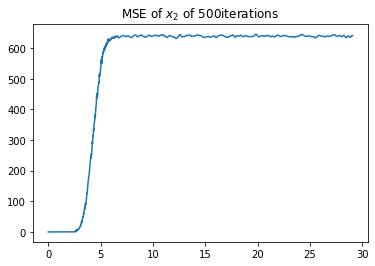

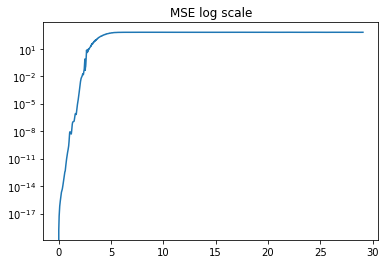

150


In [ ]:
x2_errors = np.mean((last2 - target)**2,axis=0)[:,1]
lyapunov = 0.906
tlist = np.arange((len(x2_errors) - transient )*dt, step=dt) *lyapunov

plt.plot(tlist, x2_errors[transient:])
#plt.yscale('log')
plt.title(r'MSE of $x_2$ of ' + str(n_paths) + 'iterations')
plt.show()

plt.plot(tlist, x2_errors[transient:])
plt.yscale('log')
plt.title(r'MSE log scale')
plt.show()
print(transient)

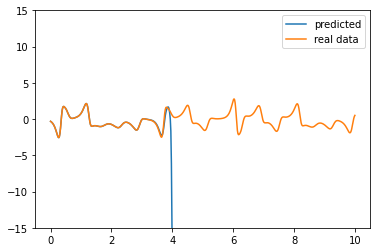

In [ ]:
num_comps = 10
num_data = len(np.where(tlist < num_comps)[0])

plt.plot(tlist[:num_data], last2[1, transient:transient+num_data, 1], label=r'predicted')
plt.plot(tlist[:num_data], target[1, transient:transient+num_data, 1], label=r'real data')
plt.plot(tlist[:num_data], abs(target[1, transient:transient+num_data, 1], last2[1, transient:transient+num_data, 1]), label=r'error')
plt.legend()
axes = plt.gca()
axes.set_ylim([-15,15])
plt.show()